In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
cpu_data = pd.read_csv('sysinfo.csv')
cpu_data

,cpu_freq,cpu_percent,sys_load_1,temperature,timestamp
0,1652.985500,0.0819,0.67,38,2018-05-10 00:00:34.102496
1,1751.238375,0.0746,0.59,38,2018-05-10 00:01:34.106931
2,1644.140375,0.0564,0.60,40,2018-05-10 00:02:34.111049
3,1827.442625,0.0925,0.61,40,2018-05-10 00:03:34.115387
4,1797.277125,0.0794,0.46,39,2018-05-10 00:04:34.119495
5,2115.837125,0.1050,1.03,39,2018-05-10 00:05:34.123510
6,1674.788125,0.0746,1.68,40,2018-05-10 00:06:34.127105
7,1616.682750,0.0324,1.16,38,2018-05-10 00:07:34.130987
8,1962.316500,0.1221,1.45,40,2018-05-10 00:08:34.134975
9,3340.498625,0.1264,0.93,43,2018-05-10 00:09:34.139116


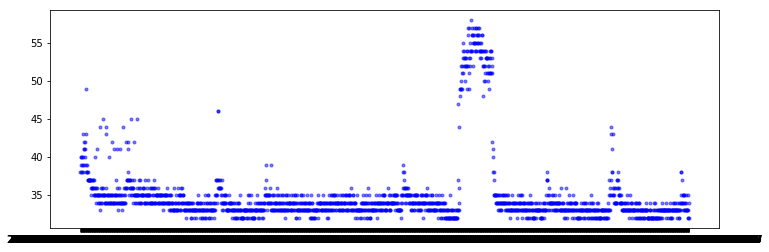

In [3]:
plt.figure(figsize=(12, 4))
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.', alpha=0.5)
plt.show() 

In [4]:
filtered = lowess(cpu_data['temperature'], cpu_data['timestamp'], frac=0.05)
plt.plot(filtered[:, 0], filtered[:, 1], 'r-', linewidth=3)

ValueError: could not convert string to float: '2018-05-11 11:59:42.909537'

In [ ]:
kalman_data = cpu_data[['temperature', 'cpu_percent', 'sys_load_1']]
initial_state = kalman_data.iloc[0]
observation_covariance = np.diag([0, 0, 0]) ** 2 # TODO: shouldn't be zero
transition_covariance = np.diag([0, 0, 0]) ** 2 # TODO: shouldn't be zero
transition = [[0, 0, 0], [0, 0, 0], [0, 0, 0]] # TODO: shouldn't (all) be zero

In [ ]:
kalman_data = cpu_data[['temperature', 'cpu_percent']]
# iloc gets the specified row of data
kalman_data

In [ ]:
initial_state = kalman_data.iloc[0]
initial_state

In [ ]:
n_samples = 25
stddev = 0.5
input_range = np.linspace(0, 2*np.pi, n_samples, dtype=np.float)
observations = pd.DataFrame()
observations['sin'] = (np.sin(input_range) + np.random.normal(0, stddev, n_samples))
observations['cos'] = (np.cos(input_range) + np.random.normal(0, stddev, n_samples))

In [ ]:
from pykalman import KalmanFilter
initial_value_guess = [0, 1]
observation_covariance = np.diag([stddev, stddev]) ** 2

In [ ]:
kf = KalmanFilter(
    initial_state_mean=initial_value_guess,
    initial_state_covariance=observation_covariance,
    observation_covariance=observation_covariance
)
pred_state, state_cov = kf.smooth(observations)

In [ ]:
a = list([[ 3.85431501e+01,  4.31315776e-01],
       [ 3.87177645e+01,  1.13821374e+00],
       [ 3.90604929e+01,  5.94950805e-01]])

In [ ]:
print(type(a))

In [ ]:
a = [0, 0, 1, 4, 7, 16, 31, 64, 127]

In [ ]:
    kalman_data = cpu_data[['temperature', 'cpu_percent']]
    # iloc gets the specified row of data
    initial_state = kalman_data.iloc[0]
    observation_stddev = 0.9
    transition_stddev = 0.3
    observation_covariance = [[observation_stddev ** 2, 0], [0, 2 ** 2]]
    transition_covariance = [[transition_stddev ** 2, 0], [0, 10 ** 2]]
    transition_covariance